<a href="https://colab.research.google.com/github/r7sy/SuttonBarto-RL2018-Sols/blob/master/Chapter%2004/Gambler's_problem_Value_iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gambler's problem: Value iteration

This notebook recreates figure 4.3 from "Reinforcement Learning an Introduction second edition"  by Richard S. Sutton and Andrew G. Barto. It also contains the solution to exercises 4.8 and  4.9; The problem is defined in the book as follows:

> " **Gambler’s Problem** A gambler has the opportunity to make bets on
the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many
dollars as he has staked on that flip; if it is tails, he loses his stake. The game ends
when the gambler wins by reaching his goal of $100, or loses by running out of money.
On each flip, the gambler must decide what portion of his capital to stake, in integer
numbers of dollars. This problem can be formulated as an undiscounted, episodic, finite MDP. The state is the gambler’s capital, s ∈ {1, 2,..., 99} and the actions
are stakes, a ∈ {0, 1,..., min(s, 100
s)}. The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1.
The state-value function then gives
the probability of winning from each
state. A policy is a mapping from
levels of capital to stakes. The optimal policy maximizes the probability
of reaching the goal. Let ph denote
the probability of the coin coming up
heads. If ph is known, then the entire problem is known and it can be
solved, for instance, by value iteration. "

The notebook implements the Value Iteration algorithm described on page 83 of the book to solve this problem.

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

In [0]:
def gamblerValueIteration(ph,goal_state=100,goal_value=1.0,threshold=1e-12,plot=True,initial_state_values=None):
  """Calculates the optimal policy's value function for the gambler's problem.
  
  The function calculates the optimal policy's value function for the gambler's 
  problem specified by the parameter values, the values are calculated using 
  value iteration which is a dynamic programming algorithm for calculating the
  optimal policy π* and its value function v* for MDPs
  
  Parameters
  ----------
  ph : probablity of heads.
  goal_state : the goal capital.
  goal_value : the value of the goal state.
  threshold : the threshold that stops the iteration.  
  plot : if True, the function plots both the value function and the policy.
  initial_state_values : initial state values to start iteration with, if 'None'
  values will be initilized to zero.
  """
  # Make sure initial_state_values has the correct shape
  assert initial_state_values is None or initial_state_values.shape==(goal_state+1,), "Supplied initial_state_values array shape does not match number of states"
  
  number_of_states=goal_state+1
  state_values=np.zeros(number_of_states)
  if initial_state_values is not None:
    state_values=initial_state_values
  state_values[goal_state]=goal_value
  policy=np.zeros(number_of_states)
  
  while True:
      delta=0.0
      # Looping over non-terminal states to calculate the values.
      for state in range(1,goal_state):
          max_return=0.0
          # Looping over all actions. No need to consider action=0 since it won't make any changes to the value function.
          for action in range(1,min(state,goal_state-state)+1):
              # Calculating the value of the state resuting from taking the current action.
              return_=ph*state_values[state+action] + (1-ph) * state_values[state-action]
              # Saving the maximum value as the return
              max_return=max(return_,max_return)
          # Calculating delta which is the maximum change made to any state in all iterations.
          delta=max(delta,np.abs(state_values[state]-max_return))
          # Saving the new maximum return as the policy value.
          state_values[state]=max_return
      # End iteration if delta is lower than the specified threshold.
      if delta<=threshold:
          break
  # Looping over all states to determine the policy.
  for state in range(1,goal_state):
    returns=[]
    for action in range(1,min(state,goal_state-state)+1):
        return_=ph*state_values[state+action] + (1-ph) * state_values[state-action]
        returns.append(return_)
    policy[state]=np.argmax(np.round(returns,10))+1
  if plot :
    plt.subplot(2,1,1)
    plt.plot(state_values)
    plt.xlabel('Capital')
    plt.ylabel('Value estimates')
    plt.subplot(2,1,2)
    plt.scatter(range(number_of_states),policy)
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')
  return state_values
  

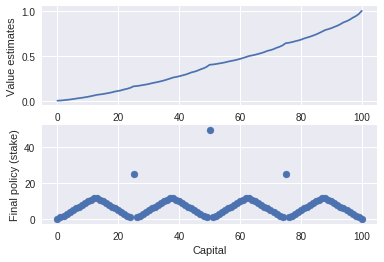

In [0]:
state_values=gamblerValueIteration(0.4);

*Exercise 4.8* Why does the optimal policy for the gambler’s problem have such a curious
form? In particular, for capital of 50 it bets it all on one flip, but for capital of 51 it does
not. Why is this a good policy?

Solution:  Since the probability of heads is 0.4, by making a large number of small bets the gambler is more likely to lose, so the algorithm attempts to make as few bets as possible, that's why it bets the entire capital at 50 for a 0.4 chance of winning, at 51 the action of betting 49 has a return of 0.4 which is the probablity of winning whereas a bet of 1 has a return of 


$$p(1-h)V(50)+p(h)V(51)=$$
$$0.6*0.4+0.4*V(51)=$$
$$0.4*(0.6+V(51))> $$ 
$$0.4*(0.6+0.4)=0.4$$
Since  $$V(51)>V(50)=0.4$$



*Exercise 4.9 (programming)* Implement value iteration for the gambler’s problem and
solve it for ph = 0.25 and ph = 0.55. In programming, you may find it convenient to
introduce two dummy states corresponding to termination with capital of 0 and 100,
giving them values of 0 and 1 respectively. Show your results graphically, as in Figure 4.3. Are your results stable as θ &rarr; 0

For the case of ph=0.25 we notice the  policy is the same for the  reasons  discussed above, the value function also has the same shape.

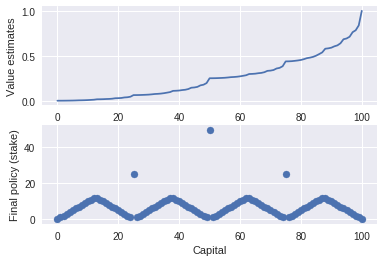

In [0]:
gamblerValueIteration(ph=0.25);

For the case of ph=0.55 the gambler is more likely to win any bet he makes than he is likely to lose, for that reason the optimal policy attempts to make the safest bet possible.

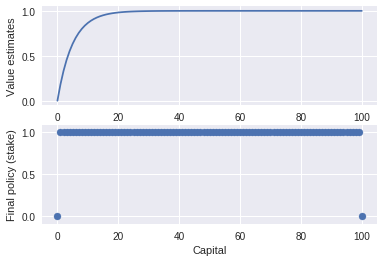

In [0]:
gamblerValueIteration(ph=0.55);

In [0]:

def visualizeValueEstimatesByThreshold(ph,starting_threshold=0.1,ending_threshold=0.0,number_of_experiments=500):
  """
  Performs value iteration using a range of thresholds and plots the resulting value functions.
  
  """
  value_functions=[]
  thresholds=np.linspace(starting_threshold,ending_threshold,number_of_experiments)
  for threshold in thresholds :
    value_functions.append(gamblerValueIteration(ph=ph,threshold=threshold,plot=False,
                                                 initial_state_values=(np.copy(value_functions[-1]) if len(value_functions)>0 else None)))
  c = np.arange(1, number_of_experiments + 1)
  norm = matplotlib.colors.Normalize(vmin=c.min(), vmax=c.max())
  cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.summer)
  cmap.set_array([])
  fig, ax = plt.subplots(dpi=100)
  for f,(color,threshold) in zip(value_functions,enumerate(thresholds)):
    plt.plot(f,c=cmap.to_rgba(color + 1))
  cbar=fig.colorbar(cmap, ticks=[1,number_of_experiments])
  cbar.ax.set_yticklabels([str(starting_threshold),str(ending_threshold)])
  cbar.set_label('Threshold')
  plt.title('Value iteration results for the gambler\'s problem (ph={}) for many thresholds'.format(ph))
  plt.xlabel('Capital')
  plt.ylabel('Value estimates');
  

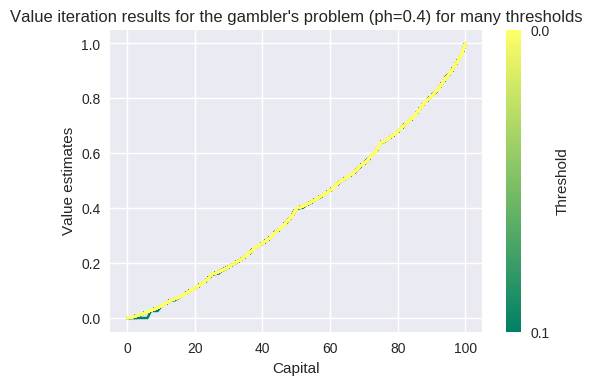

In [0]:
visualizeValueEstimatesByThreshold(0.4)

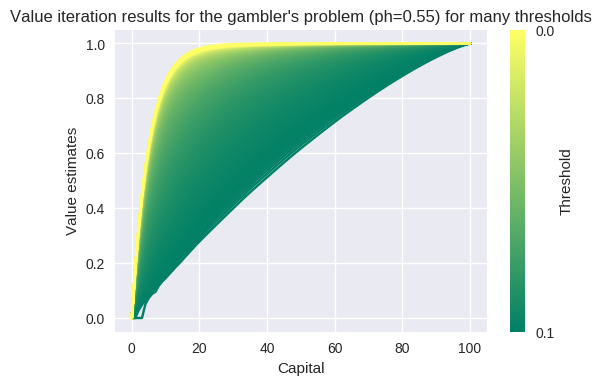

In [0]:
visualizeValueEstimatesByThreshold(0.55)

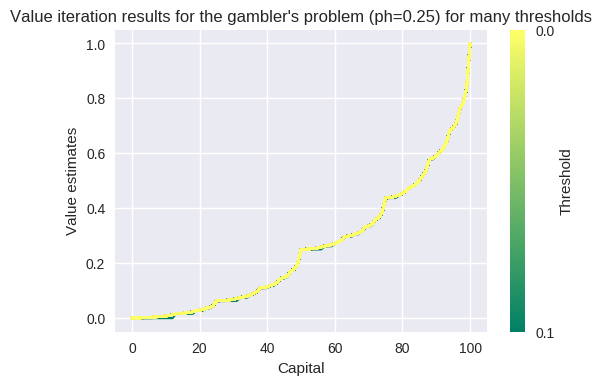

In [0]:
visualizeValueEstimatesByThreshold(0.25)

In [0]:
def visualizeErrorByThreshold(ph,starting_threshold=0.1,ending_threshold=0.0,number_of_thresholds=500,number_of_runs=30):
  """
  Performs value iteration using a range of thresholds, plots the RMS error averaged over number_of_runs test runs as a function to the threshold.
  
  """
  true_value_function=gamblerValueIteration(ph=ph,threshold=0.0,plot=False)
  average_errors=np.zeros(number_of_thresholds)
  thresholds=np.linspace(starting_threshold,ending_threshold,number_of_thresholds)
  for i in range(number_of_runs):
    value_functions=[]
    
    for threshold,j in zip(thresholds,range(number_of_thresholds)) :
      value_functions.append(gamblerValueIteration(ph=ph,threshold=threshold,plot=False,
                                                   initial_state_values=(np.copy(value_functions[-1]) if len(value_functions)>0 else None)))
      
      error=np.sqrt((np.square(true_value_function - value_functions[-1])).mean(axis=0))
      average_errors[j]=average_errors[j]+ (1/number_of_runs) * (error-average_errors[j])
  plt.plot(thresholds,average_errors)
  plt.title('Average RMS error over {} test runs for the gambler\'s problem (ph={}) as a function of the threshold'.format(number_of_runs,ph))
  plt.xlabel('Threshold')
  plt.ylabel('Average RMS error');
  

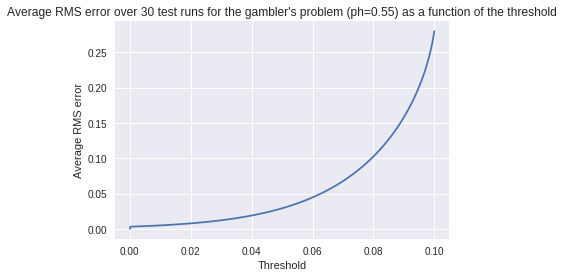

In [11]:
visualizeErrorByThreshold(0.55)

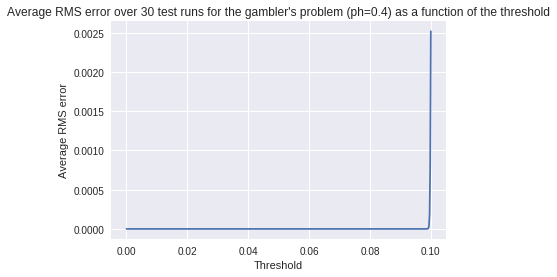

In [12]:
visualizeErrorByThreshold(0.4)

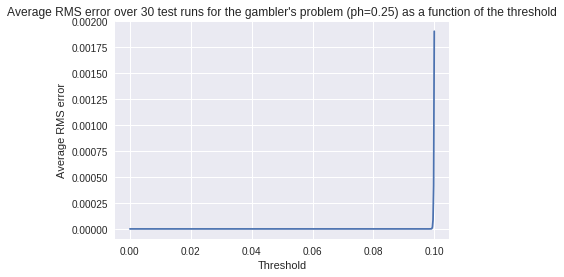

In [13]:
visualizeErrorByThreshold(0.25)